In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='latin-1')

In [11]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [13]:
df_car = df.drop(columns=['customer name','customer e-mail','country']) 

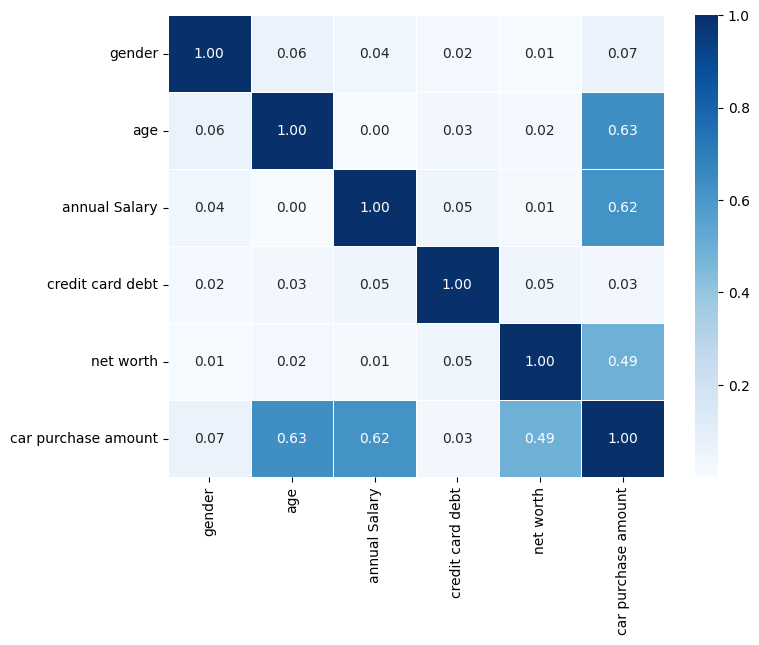

In [14]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(abs(df_car.corr()), cbar=True,  annot=True, linewidth=0.5 ,fmt='.2f', cmap='Blues')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = df_car.drop('car purchase amount',axis = 1)
y = df_car['car purchase amount']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42 ,shuffle=True)

print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

x_train shape is:  (400, 5)
x_test shape is:  (100, 5)
y_train shape is:  (400,)
y_test shape is:  (100,)


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to NumPy arrays and reshape
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fit and transform the target variables
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=1, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.2816 - val_loss: 0.2334
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2449 - val_loss: 0.2046
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2154 - val_loss: 0.1704
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1709 - val_loss: 0.1372
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1339 - val_loss: 0.1050
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0927 - val_loss: 0.0736
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0628 - val_loss: 0.0453
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0449 - val_loss: 0.0261
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - val_loss: 0.0193
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - val_loss: 0.0182
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - val_loss: 0.0178
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - val_

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) on Test Set: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164 
Test Loss: 0.01599147357046604
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error (MAE) on Test Set: 0.10104140948004392
R-squared (R2) on Test Set: 0.2533976538854018
